In [1]:
# Import required libraries
import datetime as dt
import base64

# Importaciones básicas
import pandas as pd
import numpy as np

#Importaciones de dash
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

# Importaciones de la base de datos
import psycopg2
from sqlalchemy import create_engine, text

# Importaciones de back end
import pandas as pd
import json
from flask import Flask

# Importacion k-means
from sklearn.cluster import KMeans

# Importacion de librerías gráficas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
POSTGRES_ADDRESS = 'ds4ateam32.cl8xbcsviig5.us-west-2.rds.amazonaws.com'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'DS4ATEAM32'
POSTGRES_PASSWORD = 'DS4ATEAM32'
POSTGRES_DBNAME = 'DS4ATEAM32'

# ********** Extracciones de datos de la BD ********** #
postgres_str = 'postgresql://' + POSTGRES_USERNAME + ':' + POSTGRES_PASSWORD + '@' + POSTGRES_ADDRESS + ':' + POSTGRES_PORT + '/' + POSTGRES_DBNAME
cnx = create_engine(postgres_str)

query = 'SELECT * FROM proportions_by_municipality'

df = pd.read_sql_query(query, cnx)

In [3]:
df[['poblacion','alfabetizacion','analfabetismo','escolarizado','descolarizado','remunerado','no_remunerado','atencion_formal','atencion_informal','no_necesita_atencion']].head(1)

,poblacion,alfabetizacion,analfabetismo,escolarizado,descolarizado,remunerado,no_remunerado,atencion_formal,atencion_informal,no_necesita_atencion
0,8125,0.787446,0.212554,0.806769,0.193231,0.288985,0.711015,0.098338,0.008492,0.893169


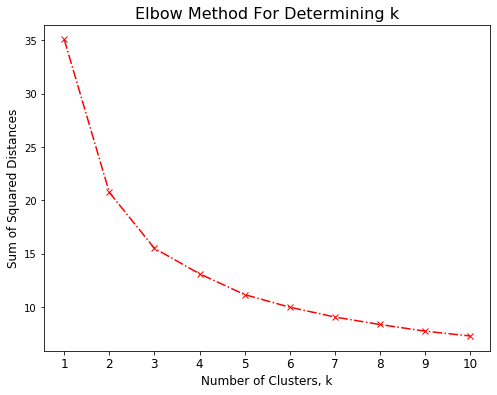

In [4]:
sum_sq_d = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df[['alfabetizacion','analfabetismo','escolarizado','descolarizado','remunerado','no_remunerado','atencion_formal','atencion_informal','no_necesita_atencion']])
    sum_sq_d.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.xticks(range(1,11), fontsize=12)
plt.show()

In [5]:
%matplotlib inline
k = 5
kmeans = KMeans(n_clusters=k,init='k-means++')
kmeans.fit(df[['alfabetizacion','analfabetismo','escolarizado','descolarizado','remunerado','no_remunerado','atencion_formal','atencion_informal','no_necesita_atencion']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = kmeans.predict(df[['alfabetizacion','analfabetismo','escolarizado','descolarizado','remunerado','no_remunerado','atencion_formal','atencion_informal','no_necesita_atencion']])

In [7]:
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 184]
 [  1 392]
 [  2 220]
 [  3  69]
 [  4 257]]


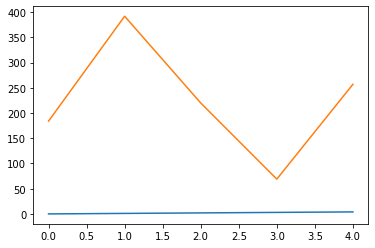

In [8]:
plt.plot(np.asarray((unique, counts)).T)

In [9]:
df['labels'] = labels

In [10]:
agrupado = df.groupby('labels').sum()

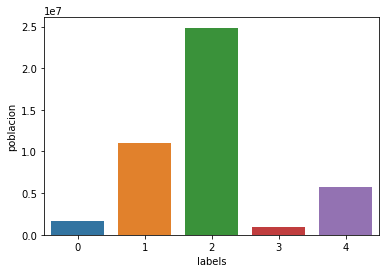

In [11]:
sns.barplot(data = agrupado, x = agrupado.index, y = 'poblacion')

In [12]:
agrupado

,poblacion,alfabetizacion,analfabetismo,escolarizado,descolarizado,remunerado,no_remunerado,atencion_formal,atencion_informal,no_necesita_atencion
labels,,,,,,,,,,
0,1660325,155.344808,28.655192,159.621212,24.378789,54.601598,129.398402,25.083746,4.809931,154.106322
1,11015067,329.808774,62.191226,337.229277,54.770723,146.089630,245.910370,30.253130,5.166198,356.580662
2,24859024,193.502096,26.497904,196.355472,23.644528,99.055324,120.944676,23.472325,3.384786,193.142887
3,949236,46.154630,22.845370,49.864512,19.135488,11.404380,57.595620,4.567398,1.799394,62.633208
4,5680765,200.546666,56.453334,207.340117,49.659883,75.633880,181.366120,17.563088,4.689334,234.747581


In [13]:
df['poblacion'].sum()

44164417

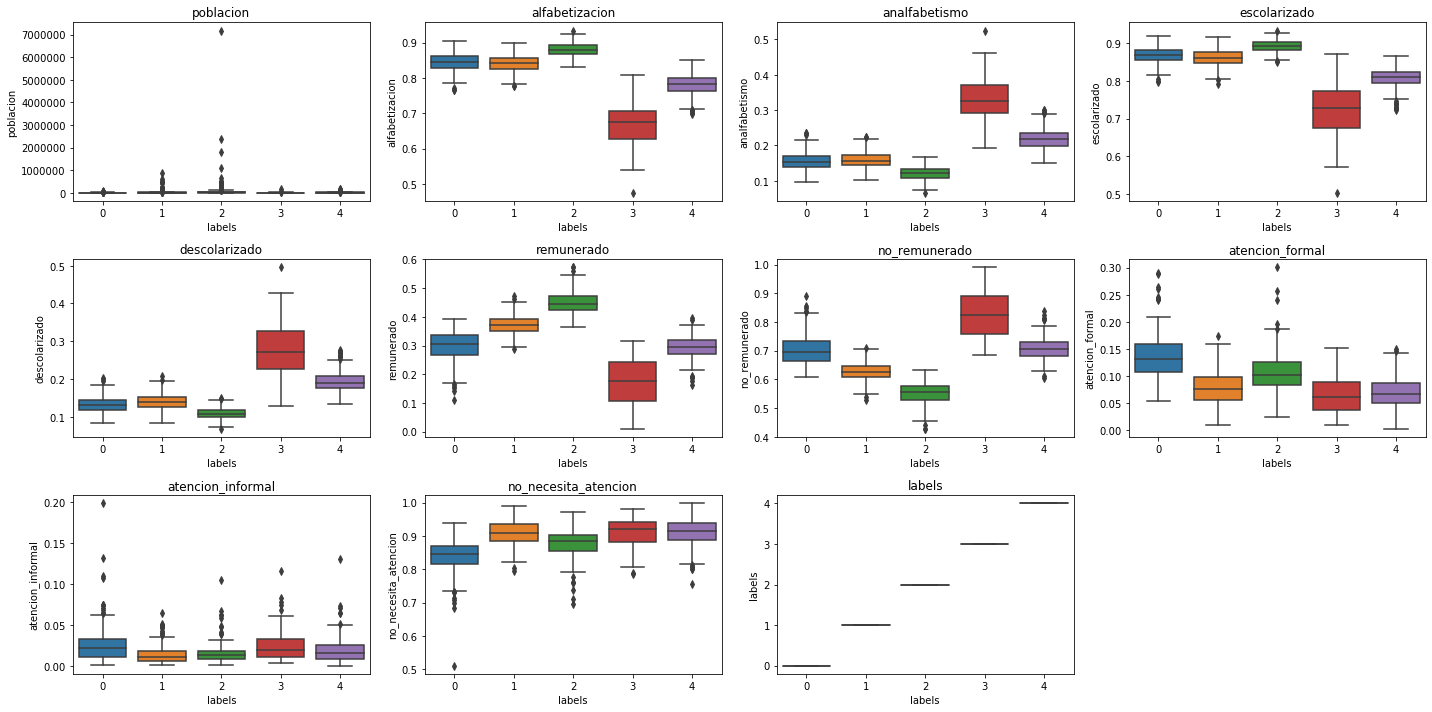

In [14]:
plt.figure(figsize=(20, 10))
k = 1
for i in df.columns:
    if i not in ['u_dpto', 'u_mpio']:
        plt.subplot(3, 4, k)
        sns.boxplot(x='labels', y=i, data=df)
        plt.title(i)
        plt.tight_layout()
        k+=1

In [15]:
# ********** Extracciones de datos de la BD ********** #
postgres_str = 'postgresql://' + POSTGRES_USERNAME + ':' + POSTGRES_PASSWORD + '@' + POSTGRES_ADDRESS + ':' + POSTGRES_PORT + '/' + POSTGRES_DBNAME
cnx = create_engine(postgres_str)

query = 'SELECT * FROM colombia_data_sample'

df2 = pd.read_sql_query(query, cnx)

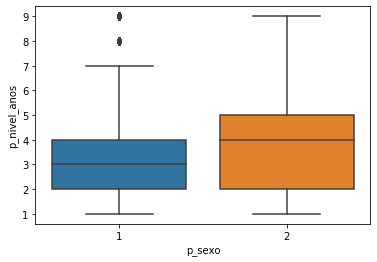

In [16]:
sns.boxplot(x='p_sexo', y='p_nivel_anos', data=df2[df2['p_nivel_anos'].isin(['1','2','3','4','5','6','7','8','9'])])